In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline
train = pd.read_csv('AirPassengers.csv')

In [4]:
train['Month'] = pd.to_datetime(train['Month'], format='%Y-%m')
train['Year'] = train['Month'].dt.year
train.head()

,Month,#Passengers,Year
0,1949-01-01,112,1949
1,1949-02-01,118,1949
2,1949-03-01,132,1949
3,1949-04-01,129,1949
4,1949-05-01,121,1949


In [6]:
year = train['Year'].values.reshape(-1, 1)
values = train['#Passengers'].values

In [7]:
x=year
y=values

In [8]:
X = [2*(i-(sum(x)/len(x))) for i in x]
x2 = [i ** 2 for i in X]
xy = [i * j for i, j in zip(X, y)]
x3 = [i ** 3 for i in X]
x4 = [i ** 4 for i in X]
x2y = [i * j for i, j in zip(x2, y)]

In [9]:
table = [[i, j, k, l, m,n,o,p] for i, j, k, l, m,n,o,p in zip(x, y, X, x2, x3,x4,xy,x2y)]


In [10]:
print(tabulate(table, headers=["Year", "Prod", "X=x-2013", "X^2", "X^3", "X^4", "xy", "x2y"], tablefmt="grid"))

+--------+--------+------------+-------+-------+-------+-------+-------+
|   Year |   Prod |   X=x-2013 |   X^2 |   X^3 |   X^4 |    xy |   x2y |
+========+========+============+=======+=======+=======+=======+=======+
|   1949 |    112 |        -11 |   121 | -1331 | 14641 | -1232 | 13552 |
+--------+--------+------------+-------+-------+-------+-------+-------+
|   1949 |    118 |        -11 |   121 | -1331 | 14641 | -1298 | 14278 |
+--------+--------+------------+-------+-------+-------+-------+-------+
|   1949 |    132 |        -11 |   121 | -1331 | 14641 | -1452 | 15972 |
+--------+--------+------------+-------+-------+-------+-------+-------+
|   1949 |    129 |        -11 |   121 | -1331 | 14641 | -1419 | 15609 |
+--------+--------+------------+-------+-------+-------+-------+-------+
|   1949 |    121 |        -11 |   121 | -1331 | 14641 | -1331 | 14641 |
+--------+--------+------------+-------+-------+-------+-------+-------+
|   1949 |    135 |        -11 |   121 | -1331 | 14

In [22]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

PolynomialFeatures(degree=4)

In [24]:
lin2 = LinearRegression()
lin2.fit(X_poly, y)

LinearRegression()

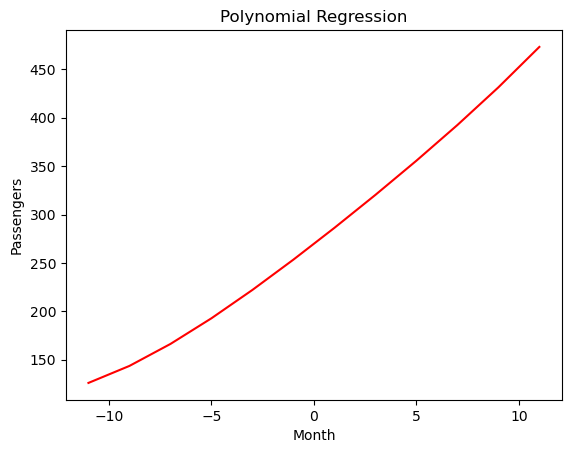

In [29]:
plt.plot(X, lin2.predict(poly.fit_transform(X)),
color='red')
plt.title('Polynomial Regression')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()


In [25]:
pred = 110.0
pred = 110.0
predarray = np.array([[pred]])
lin.predict(predarray)


array([2036.1159188])

In [26]:
pred2 = 110.0
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

array([96851.89737982])